In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings

warnings.filterwarnings('ignore')

Load Dataset

In [5]:
dataset = '../dataset'
filepaths = []
labels = []

folds = os.listdir(dataset)

In [6]:
for fold in folds:
    f_path = os.path.join(dataset, fold)
    imgs = os.listdir(f_path)
    for img in imgs:
        img_path = os.path.join(f_path, img)
        filepaths.append(img_path)
        labels.append(fold)

file_path_series = pd.Series(filepaths, name='filepath')
label_series = pd.Series(labels, name='label')
df_train = pd.concat([file_path_series, label_series], axis=1)

Split dataset

In [7]:
train_df, dummy_df = train_test_split(df_train, train_size=0.8, shuffle=True, random_state=42)
valid_df, test_df = train_test_split(dummy_df, test_size=0.5, shuffle=True, random_state=42)

print(f"The shape of The Train data is: {train_df.shape}")
print(f"The shape of The Validation data is: {valid_df.shape}")
print(f"The shape of The Test data is: {test_df.shape}")

The shape of The Train data is: (202, 2)
The shape of The Validation data is: (25, 2)
The shape of The Test data is: (26, 2)


Data Generator

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

print("Training Data")
train_ds = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='label',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

print("Validation Data")
validation_ds = validation_test_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='filepath',
    y_col='label',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

print("Test Data")
test_ds = validation_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col='label',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Training Data
Found 202 validated image filenames belonging to 2 classes.
Validation Data
Found 25 validated image filenames belonging to 2 classes.
Test Data
Found 26 validated image filenames belonging to 2 classes.


In [9]:
print("Testing Training Data Generator")
x_train, y_train = next(iter(train_ds))
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

print("Testing Validation Data Generator")
x_valid, y_valid = next(iter(validation_ds))
print(f"x_valid shape: {x_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")

Testing Training Data Generator
x_train shape: (32, 256, 256, 3)
y_train shape: (32,)
Testing Validation Data Generator
x_valid shape: (25, 256, 256, 3)
y_valid shape: (25,)


Pie chart for class distribution

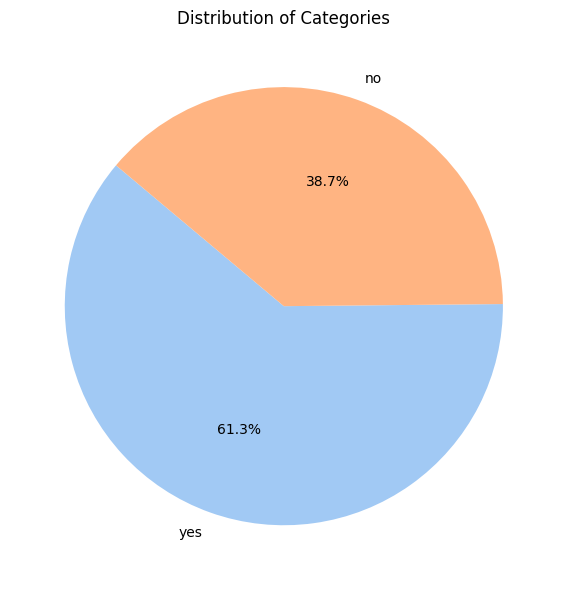

In [11]:
count = df_train['label'].value_counts()

plt.figure(figsize=(6, 6), facecolor='white')
palette_pie = sns.color_palette("pastel")
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=140, colors=palette_pie)
plt.title('Distribution of Categories')
plt.tight_layout()
plt.show()

Plot bar for class distribution

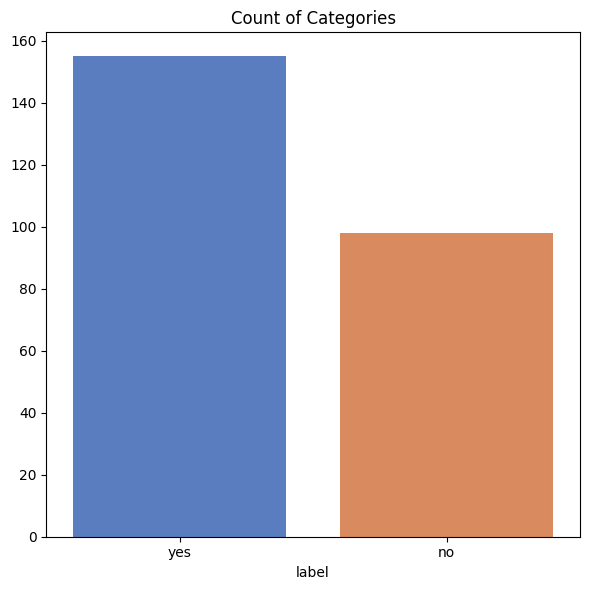

In [12]:
plt.figure(figsize=(6, 6), facecolor='white')
palette_bar = sns.color_palette("muted")
sns.barplot(x=count.index, y=count.values, palette=palette_bar)
plt.title('Count of Categories')
plt.tight_layout()
plt.show()

Plot distribution of label train, validation, and test dataset

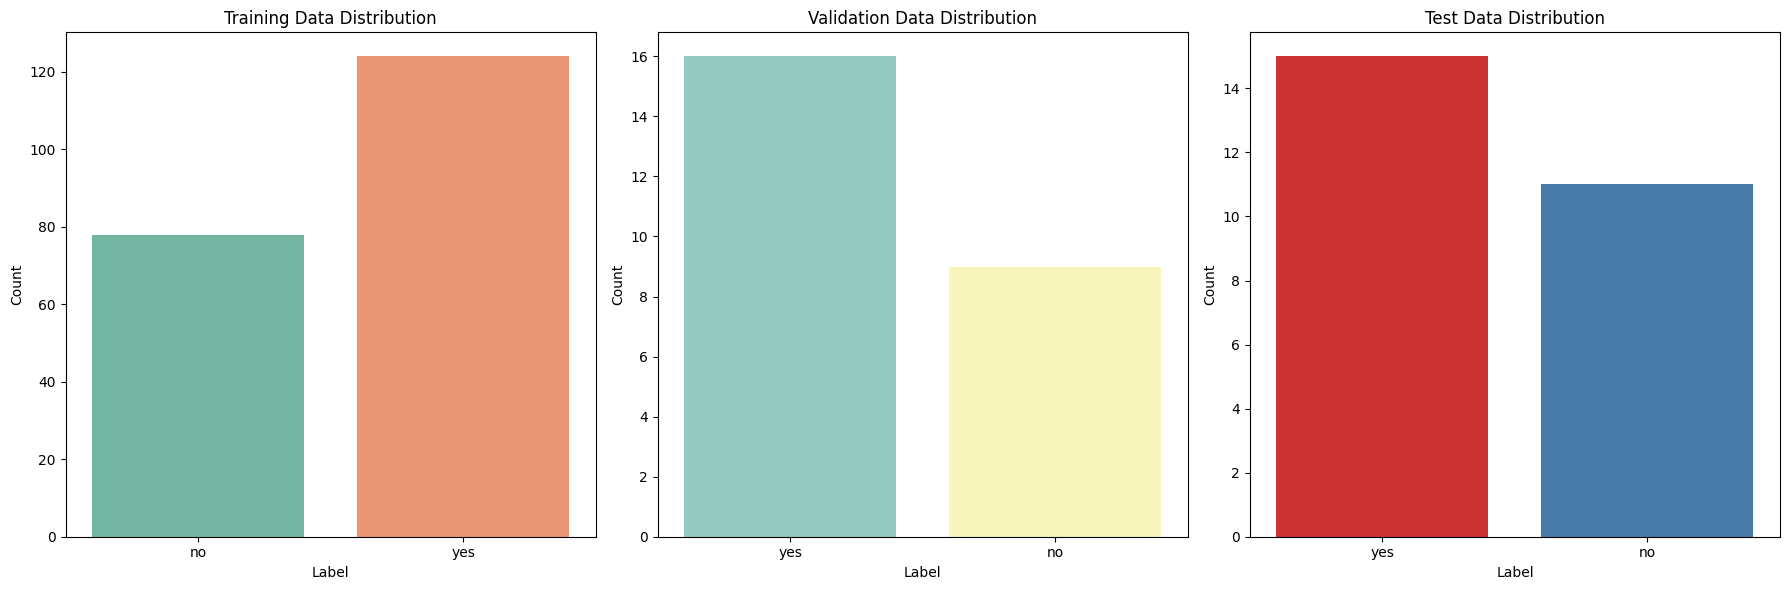

In [16]:
def plot_label_distribution(df, title, palette, ax):
    sns.countplot(x='label', data=df, palette=palette, ax=ax)
    ax.set_title(title)
    ax.set_ylabel('Count')
    ax.set_xlabel('Label')

fig, axs = plt.subplots(1, 3, figsize=(18, 6), facecolor='white')

plot_label_distribution(train_df, 'Training Data Distribution', "Set2", axs[0])
plot_label_distribution(valid_df, 'Validation Data Distribution', "Set3", axs[1])
plot_label_distribution(test_df, 'Test Data Distribution', "Set1", axs[2])

plt.tight_layout()
plt.show()


Display images randomly 

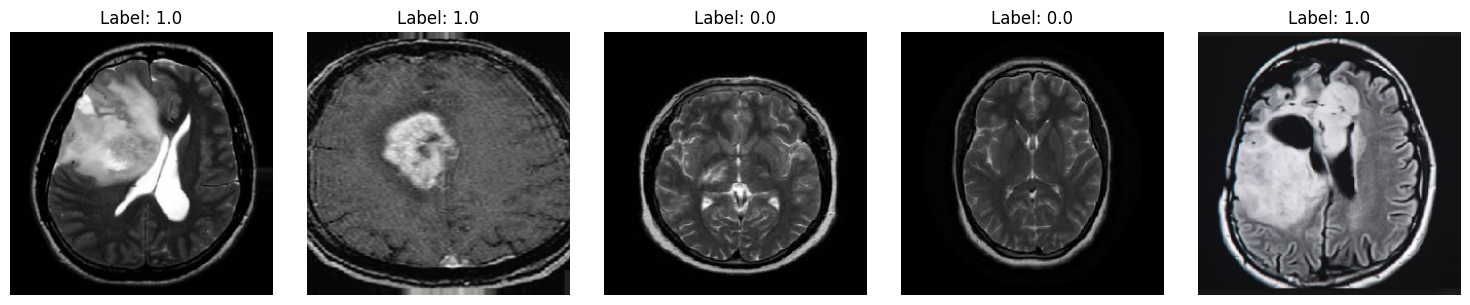

Class labels: {'no': 0, 'yes': 1}


In [17]:
def display_random_images(generator, num_images):
    batch = next(generator)
    selected_indices = random.sample(range(len(batch[0])), min(num_images, len(batch[0])))
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    for i, idx in enumerate(selected_indices):
        image = batch[0][idx]  
        label = batch[1][idx]  
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(f"Label: {label}")  

    plt.tight_layout()
    plt.show()

display_random_images(train_ds, 5)

class_labels = train_ds.class_indices
print(f'Class labels: {class_labels}')